In [1]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_train = 100
num_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5.0

In [9]:
x = nd.random.normal(shape=(num_train + num_test, 1))
X = nd.concat(x, nd.power(x, 2), nd.power(x, 3))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_w[2] * X[:, 2] + true_b
y += .1 * nd.random.normal(shape=y.shape)

x = nd.concat(x, x, x)
y_linear = true_w[0] * x[:, 0] + true_w[1] * x[:, 1] + true_w[2] * x[:, 2] + true_b
('x:', x[:5], 'X:', X[:5], 'y:', y[:5])

('x:', 
 [[-0.60619372 -0.60619372 -0.60619372]
  [-0.85862815 -0.85862815 -0.85862815]
  [-1.75419199 -1.75419199 -1.75419199]
  [ 1.49487126  1.49487126  1.49487126]
  [-0.25761503 -0.25761503 -0.25761503]]
 <NDArray 5x3 @cpu(0)>, 'X:', 
 [[-0.60619372  0.36747083 -0.2227585 ]
  [-0.85862815  0.73724228 -0.633017  ]
  [-1.75419199  3.07718945 -5.39798117]
  [ 1.49487126  2.23464012  3.34049916]
  [-0.25761503  0.0663655  -0.01709675]]
 <NDArray 5x3 @cpu(0)>, 'y:', 
 [  1.84549415  -2.05702162 -37.75357056  17.90671158   4.4835968 ]
 <NDArray 5 @cpu(0)>)

In [28]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(X_train, X_test, y_train, y_test):
    # 线性回归模型
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.initialize()
    # 设一些默认参数
    learning_rate = 0.001
    epochs = 1000
    batch_size = min(100, y_train.shape[0])
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size, shuffle=True)
    # 默认SGD和均方误差
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {
        'learning_rate': learning_rate})
    square_loss = gluon.loss.L2Loss()
    # 保存训练和测试损失
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(square_loss(
            net(X_train), y_train).mean().asscalar())
        test_loss.append(square_loss(
            net(X_test), y_test).mean().asscalar())
    # 打印结果    
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train','test'])
    plt.show()
    return ('learned weight', net[0].weight.data(), 
            'learned bias', net[0].bias.data())

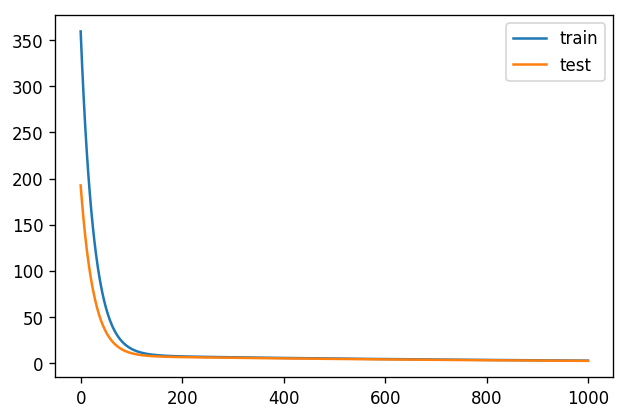

('learned weight', 
 [[ 1.05367911 -2.17503548  5.79007149]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 2.08108044]
 <NDArray 1 @cpu(0)>)

In [29]:
train(X[:num_train, :], X[num_train:, :], y[:num_train], y[num_train:])

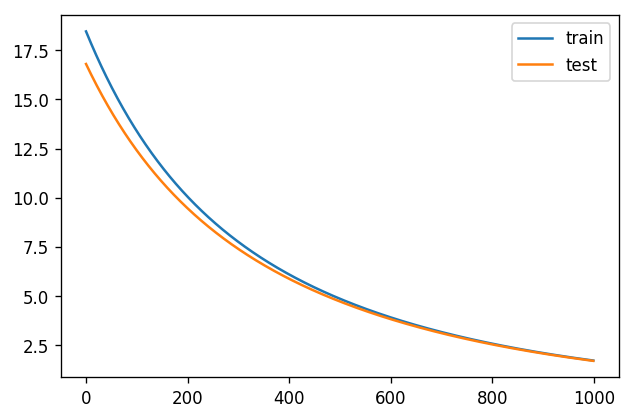

('learned weight', 
 [[ 1.09953797  1.12130082  1.01488769]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 3.15497828]
 <NDArray 1 @cpu(0)>)

In [30]:
train(x[:num_train, :], x[num_train:, :], y_linear[:num_train], y_linear[num_train:])

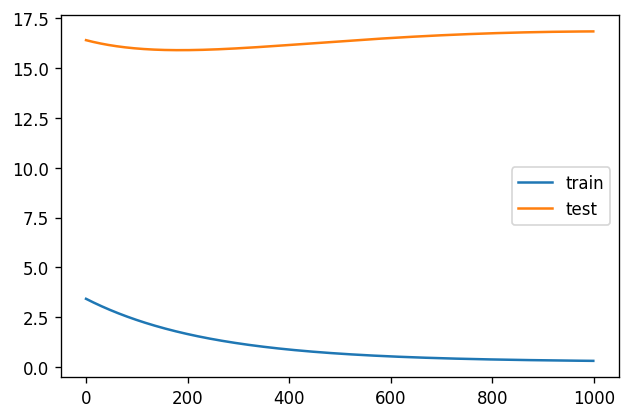

('learned weight', 
 [[-0.7058832   0.50792968 -0.32266355]]
 <NDArray 1x3 @cpu(0)>, 'learned bias', 
 [ 1.15646708]
 <NDArray 1 @cpu(0)>)

In [31]:
train(X[0:2, :], X[num_train:, :], y_linear[0:2], y_linear[num_train:])